In [126]:
import pandas as pd 
import numpy as np 


In [127]:
df = pd.read_csv("stable_materials_summary.csv")

<Axes: xlabel='Crystal System'>

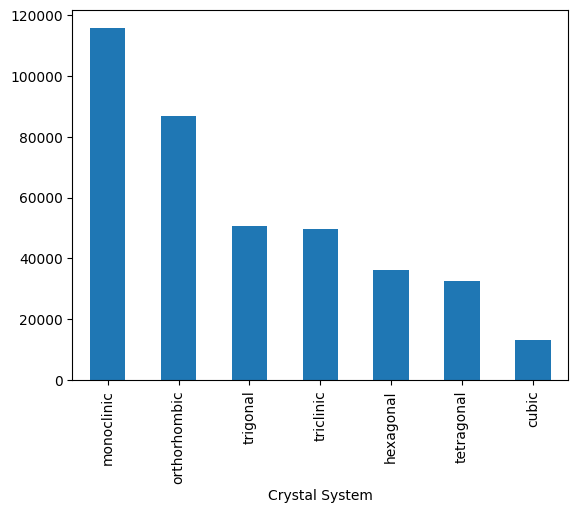

In [128]:
#%pip install matplotlib -q
import matplotlib.pyplot as plt
df["Crystal System"].value_counts().plot(kind='bar')

In [129]:
#convert convert = {"Monoclinic":0, "Triclinic":1, "Orthorhombic":2, "Tetragonal":3, "Hexagonal":4, "Cubic":5, "Trigonal":6} and set it to existing column
convert = {"Monoclinic":0, "Triclinic":1, "Orthorhombic":2, "Tetragonal":3, "Hexagonal":4, "Cubic":5, "Trigonal":6}
df["Crystal System"] = df["Crystal System"].map(convert)
df

,Unnamed: 0,Composition,MaterialId,Reduced Formula,Elements,NSites,Volume,Density,Point Group,Space Group,...,Corrected Energy,Formation Energy Per Atom,Decomposition Energy Per Atom,Dimensionality Cheon,Bandgap,Is Train,Decomposition Energy Per Atom All,Decomposition Energy Per Atom Relative,Decomposition Energy Per Atom MP,Decomposition Energy Per Atom MP OQMD
0,0,Cs1S6Zr3,000006a8c4,Cs(ZrS2)3,"['S', 'Zr', 'Cs']",10,302.9202,3.2834,2/m,C2/m,...,-70.4155,-1.9058,-0.1625,intercalated ion,0.0023,True,0.0,NaN,-0.1625,-0.0733
1,1,Nd7Os1Pr3Si5,00011f62be,Pr3Nd7Si5Os,"['Si', 'Pr', 'Nd', 'Os']",16,430.2851,6.8040,1,P1,...,-94.0804,-0.5004,-0.0137,3D,0.0022,True,0.0,NaN,-0.0137,-0.0106
2,2,Ce2La3Pt16Tm15,00012feb99,La3Ce2Tm15Pt16,"['La', 'Ce', 'Tm', 'Pt']",36,828.6647,12.7292,1,P1,...,-237.6016,-1.2960,-0.1195,3D,NaN,True,0.0,NaN,-0.1195,-0.1185
3,3,Mn1Ni1Os2Sb12Yb1,00014cac13,YbMnNi(Sb6Os)2,"['Mn', 'Ni', 'Sb', 'Yb', 'Os']",17,407.2614,8.6776,-1,P-1,...,-93.6931,-0.3064,-0.0837,3D,0.0011,True,-0.0,NaN,-0.0837,-0.0772
4,4,Er8Ge4Si12Zr12,0001759321,Er2Zr3Si3Ge,"['Si', 'Ge', 'Zr', 'Er']",36,727.5283,6.9851,1,P1,...,-254.0953,-0.8718,-0.0186,3D,inf,True,-0.0,NaN,-0.0186,-0.0176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384866,384866,Ga3Lu2Si1Tb4,ffff0b1194,Tb4Lu2Ga3Si,"['Si', 'Ga', 'Tb', 'Lu']",10,245.5848,8.2687,mm2,Amm2,...,-48.0143,-0.5925,-0.0143,3D,0.0009,True,0.0,NaN,-0.0143,-0.0138
384867,384867,Au1Cd3Sm3Sn2,ffff3e9e89,Sm3Cd3Sn2Au,"['Cd', 'Sn', 'Sm', 'Au']",9,229.2117,8.8579,-6m2,P-62m,...,-33.6678,-0.6056,-0.0218,3D,0.0198,True,-0.0,NaN,-0.0218,-0.0217
384868,384868,Ba1H30Th7,ffff611aad,BaTh7H30,"['H', 'Ba', 'Th']",38,391.5742,7.5986,3,R3,...,-178.4183,-0.6005,-0.0252,intercalated ion,2.5688,True,0.0,NaN,-0.0252,-0.0251
384869,384869,Al2Bi8K6Sr6,ffff99b793,K3Sr3AlBi4,"['Al', 'K', 'Sr', 'Bi']",22,876.4484,4.7103,6mm,P6_3mc,...,-68.7495,-0.6063,-0.0189,intercalated ion,NaN,True,0.0,NaN,-0.0189,-0.0068


In [130]:
#df = pd.read_csv("stable_materials_summary.csv")
df = df.drop(["MaterialId"], axis=1)
df= df.drop(["Decomposition Energy Per Atom Relative"], axis=1)
df["Dimensionality Cheon"] = df["Dimensionality Cheon"].apply(lambda x: x if type(x) == float else np.nan)
df["Dimensionality Cheon"]
df["Dimensionality Cheon"] = df["Dimensionality Cheon"].astype(float)
df["Dimensionality Cheon"] = df["Dimensionality Cheon"].fillna(df["Dimensionality Cheon"].median())
df["Bandgap"] = df["Bandgap"].fillna(df["Bandgap"].median())
df["Is Train"] = df["Is Train"].fillna(df["Is Train"].median())
df["Decomposition Energy Per Atom All"] = df["Decomposition Energy Per Atom All"].fillna(df["Decomposition Energy Per Atom All"].median())
df["Decomposition Energy Per Atom MP"] = df["Decomposition Energy Per Atom MP"].fillna(df["Decomposition Energy Per Atom MP"].median())
df["Decomposition Energy Per Atom MP OQMD"] = df["Decomposition Energy Per Atom MP OQMD"].fillna(df["Decomposition Energy Per Atom MP OQMD"].median())

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [133]:

#df["MaterialId"] = df["MaterialId"].fillna('unknown')
#df["Crystal System"] = df["Crystal System"].fillna(df["Crystal System"].mode()[0])
df["Point Group"] = df["Point Group"].fillna(df["Point Group"].mode()[0])
df["Dimensionality Cheon"] = df["Dimensionality Cheon"].fillna(df["Dimensionality Cheon"].median())


c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [134]:
#convert composition, material id, reduced formula , elements, space group , dimensionality cheon, bandgap, is train to float
df["Composition"] = df["Composition"].astype(float)
#df["Material ID"] = df["Material ID"].astype(float)
df["Reduced Formula"] = df["Reduced Formula"].astype(float)
df["Elements"] = df["Elements"].astype(float)
df["Space Group"] = df["Space Group"].astype(float)
df["Dimensionality Cheon"] = df["Dimensionality Cheon"].astype(float)
df["Bandgap"] = df["Bandgap"].astype(float)
df["Is Train"] = df["Is Train"].astype(float)


ValueError: could not convert string to float: 'Cs1S6Zr3'

In [85]:

df["Decomposition Energy Per Atom All"] = df["Decomposition Energy Per Atom All"].astype(float)

In [135]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

if 'Composition' in df.columns:
    df['Composition'] = le.fit_transform(df['Composition'])
if 'Material ID' in df.columns:
    df['Material ID'] = le.fit_transform(df['Material ID'])
if 'Reduced Formula' in df.columns:
    df['Reduced Formula'] = le.fit_transform(df['Reduced Formula'])
if 'Elements' in df.columns:
    df['Elements'] = le.fit_transform(df['Elements'])
if 'Space Group' in df.columns:
    df['Space Group'] = le.fit_transform(df['Space Group'])
if 'Dimensionality Cheon' in df.columns:
    df['Dimensionality Cheon'] = le.fit_transform(df['Dimensionality Cheon'])
if 'Bandgap' in df.columns:
    df['Bandgap'] = le.fit_transform(df['Bandgap'])
if 'Is Train' in df.columns:
    df['Is Train'] = le.fit_transform(df['Is Train'])


In [137]:
#drop point group
df = df.drop(["Point Group"], axis=1)

In [136]:
df

,Unnamed: 0,Composition,Reduced Formula,Elements,NSites,Volume,Density,Point Group,Space Group,Space Group Number,Crystal System,Corrected Energy,Formation Energy Per Atom,Decomposition Energy Per Atom,Dimensionality Cheon,Bandgap,Is Train,Decomposition Energy Per Atom All,Decomposition Energy Per Atom MP,Decomposition Energy Per Atom MP OQMD
0,0,209231,39871,163207,10,302.9202,3.2834,2/m,6,12,NaN,-70.4155,-1.9058,-0.1625,0,23,1,0.0,-0.1625,-0.0733
1,1,355560,220471,181188,16,430.2851,6.8040,1,92,1,NaN,-94.0804,-0.5004,-0.0137,0,22,1,0.0,-0.0137,-0.0106
2,2,173457,143223,83526,36,828.6647,12.7292,1,92,1,NaN,-237.6016,-1.2960,-0.1195,0,47,1,0.0,-0.1195,-0.1185
3,3,344245,364467,102592,17,407.2614,8.6776,-1,70,2,NaN,-93.6931,-0.3064,-0.0837,0,11,1,-0.0,-0.0837,-0.0772
4,4,254904,78813,176755,36,727.5283,6.9851,1,92,1,NaN,-254.0953,-0.8718,-0.0186,0,24824,1,-0.0,-0.0186,-0.0176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384866,384866,276307,286928,176008,10,245.5848,8.2687,mm2,3,38,NaN,-48.0143,-0.5925,-0.0143,0,9,1,0.0,-0.0143,-0.0138
384867,384867,66679,248601,46573,9,229.2117,8.8579,-6m2,89,189,NaN,-33.6678,-0.6056,-0.0218,0,198,1,-0.0,-0.0218,-0.0217
384868,384868,104064,14687,75275,38,391.5742,7.5986,3,203,146,NaN,-178.4183,-0.6005,-0.0252,0,17179,1,0.0,-0.0252,-0.0251
384869,384869,36850,133880,5174,22,876.4484,4.7103,6mm,164,186,NaN,-68.7495,-0.6063,-0.0189,0,47,1,0.0,-0.0189,-0.0068


In [107]:
df.isnull().sum()

Unnamed: 0                               0
Composition                              0
Reduced Formula                          0
Elements                                 0
NSites                                   0
Volume                                   0
Density                                  0
Point Group                              0
Space Group                              0
Space Group Number                       0
Crystal System                           0
Corrected Energy                         0
Formation Energy Per Atom                0
Decomposition Energy Per Atom            0
Dimensionality Cheon                     0
Bandgap                                  0
Is Train                                 0
Decomposition Energy Per Atom All        0
Decomposition Energy Per Atom MP         0
Decomposition Energy Per Atom MP OQMD    0
dtype: int64

In [138]:
X = df.drop(["Formation Energy Per Atom", "Decomposition Energy Per Atom", "Bandgap"], axis=1)
y = df[["Formation Energy Per Atom", "Decomposition Energy Per Atom", "Bandgap"]]


In [139]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score , mean_squared_error

In [140]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#y_train = np.asarray(y_train).astype(np.float32)
#X_train = np.asarray(X_train).astype(np.float32)

In [141]:
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=250, max_depth = 5, random_state=42))
model

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=5,
                                                     n_estimators=250,
                                                     random_state=42))

In [98]:
# Convert columns to numeric, errors='coerce' will set non-numeric values to NaN
for col in X_train.columns:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')

# Do the same for X_test
for col in X_test.columns:
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

# Fill NaN values with the median of the column
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())


In [142]:
model.fit(X_train, y_train)

y_pred=  model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_pred, y_test)

print(f"MSE : {mse: .3f} | R2 :{r2_score:.3f}")

MSE :  7668586.180 | R2 :-0.846
